In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split  # Fix import here
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
%matplotlib inline

In [21]:
Iris=pd.read_csv("C:\\Users\\asmit\\Downloads\\IRIS.csv")

Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
Iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
140,6.7,3.1,5.6,2.4,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa


In [24]:
Iris['species']=Iris['species'].str.replace('Iris-','')


In [25]:
Iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Sepal Length & Width

Text(0, 0.5, 'Length/Width')

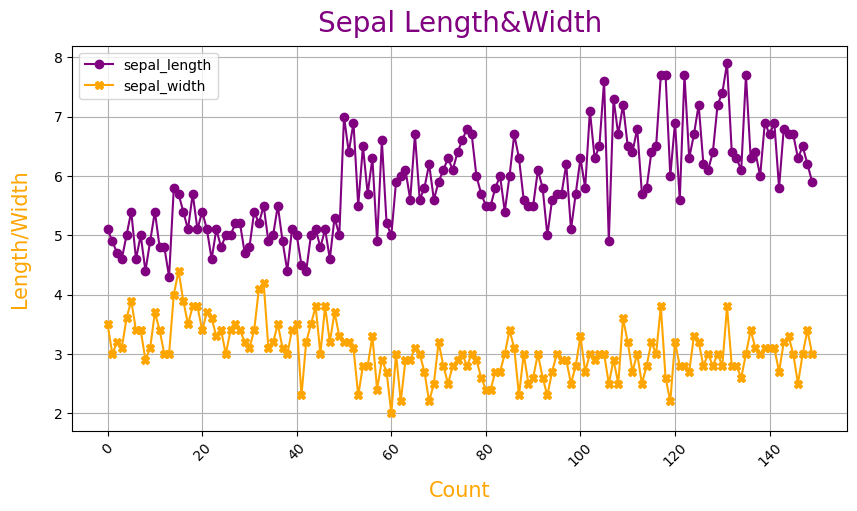

In [28]:
#Iris['sepal_length'].plot(kind='hist')
Iris['sepal_length'].plot(kind='line',legend=True,marker='o',color='purple',figsize=(10,5),grid=True,rot=45)
Iris['sepal_width'].plot(kind='line',legend=True,marker="X",color='orange',figsize=(10,5),grid=True,rot=45)
plt.title('Sepal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'purple','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'orange','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'orange','verticalalignment': 'baseline',})

In [ ]:
#Sepal length is greater then Sepal width

Text(0, 0.5, 'Length/Width')

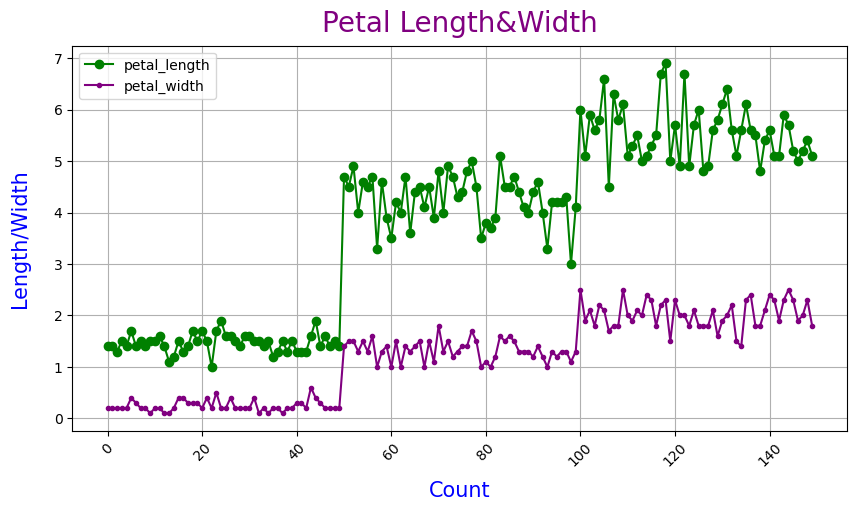

In [29]:
Iris['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
Iris['petal_width'].plot(kind='line',legend=True,marker=".",color='purple',figsize=(10,5),grid=True,rot=45)
plt.title('Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'purple','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

In [ ]:
#Petal length is greater then Petal width

Text(0, 0.5, 'Length/Width')

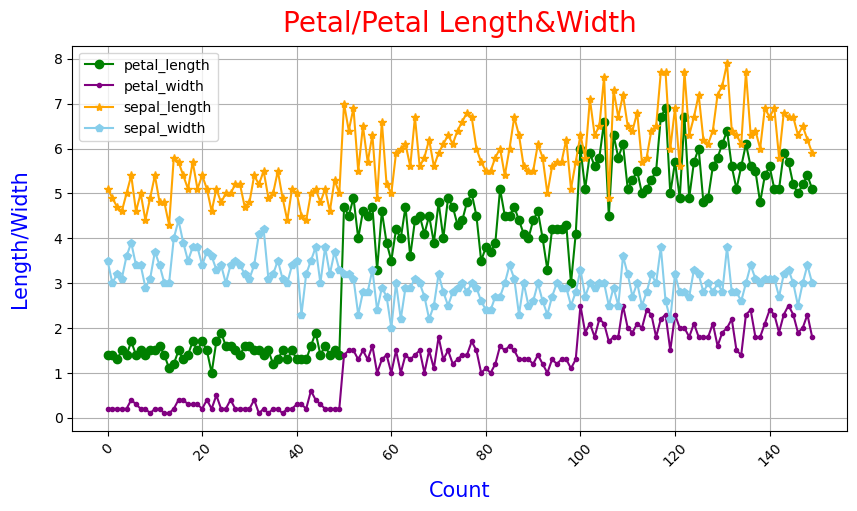

In [30]:
Iris['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
Iris['petal_width'].plot(kind='line',legend=True,marker=".",color='purple',figsize=(10,5),grid=True,rot=45)
Iris['sepal_length'].plot(kind='line',legend=True,marker="*",color='orange',figsize=(10,5),grid=True,rot=45)
Iris['sepal_width'].plot(kind='line',legend=True,marker="p",color='skyblue',figsize=(10,5),grid=True,rot=45)
plt.title('Petal/Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

In [31]:
Iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [32]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = Iris[feature_columns].values
y = Iris['species'].values


In [33]:
#Label encoding

le = LabelEncoder()
y = le.fit_transform(y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#3. Data Visualization

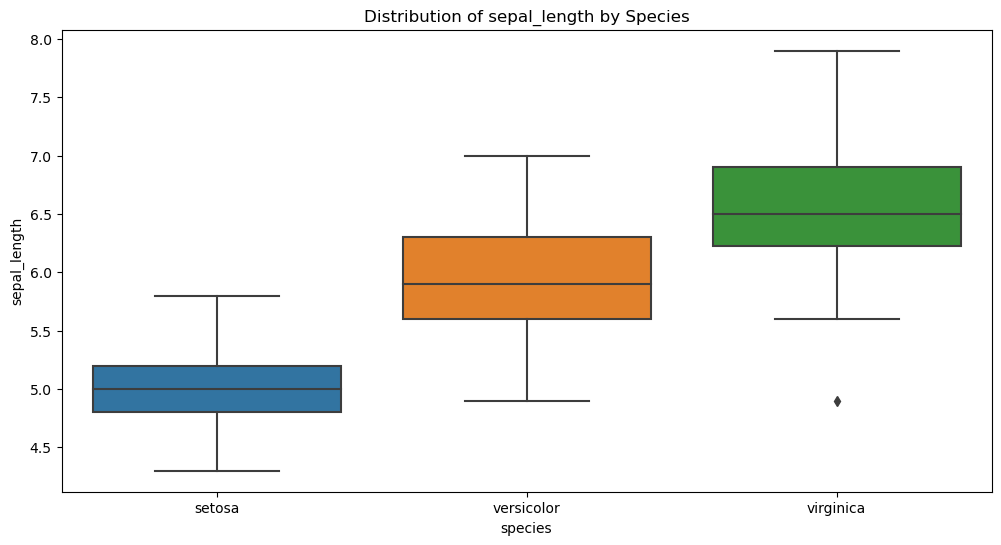

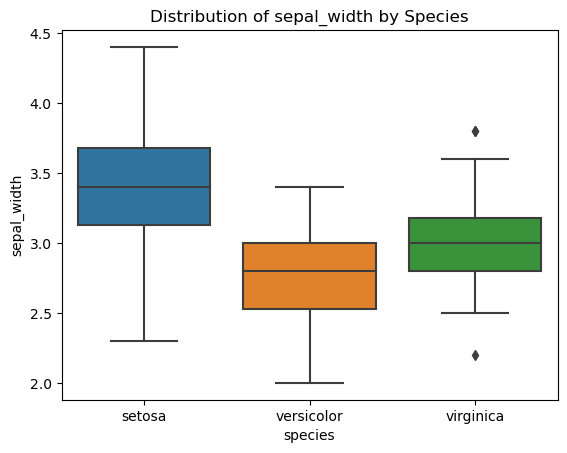

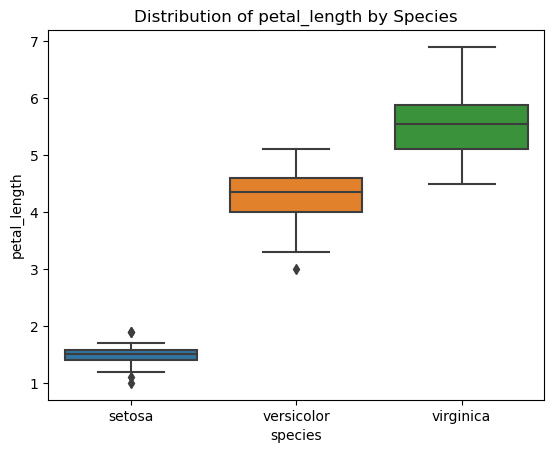

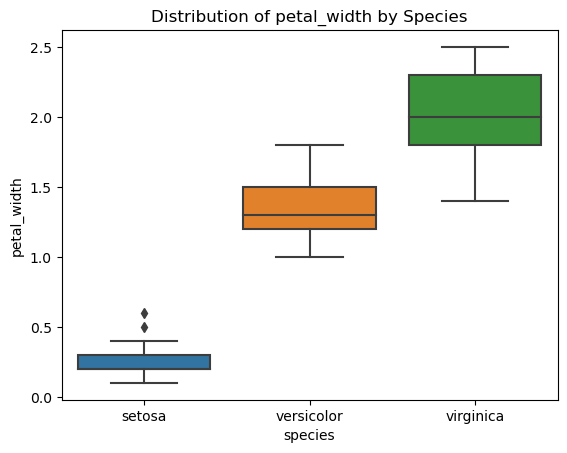

In [35]:
#1. Box plot for each feature by species
plt.figure(figsize=(12, 6))
for col in Iris.columns[:-1]:  # Exclude the species column
    sns.boxplot(x='species', y=col, data=Iris)
    plt.title(f'Distribution of {col} by Species')
    plt.show()

In [ ]:
#3. Parallel Coordinates

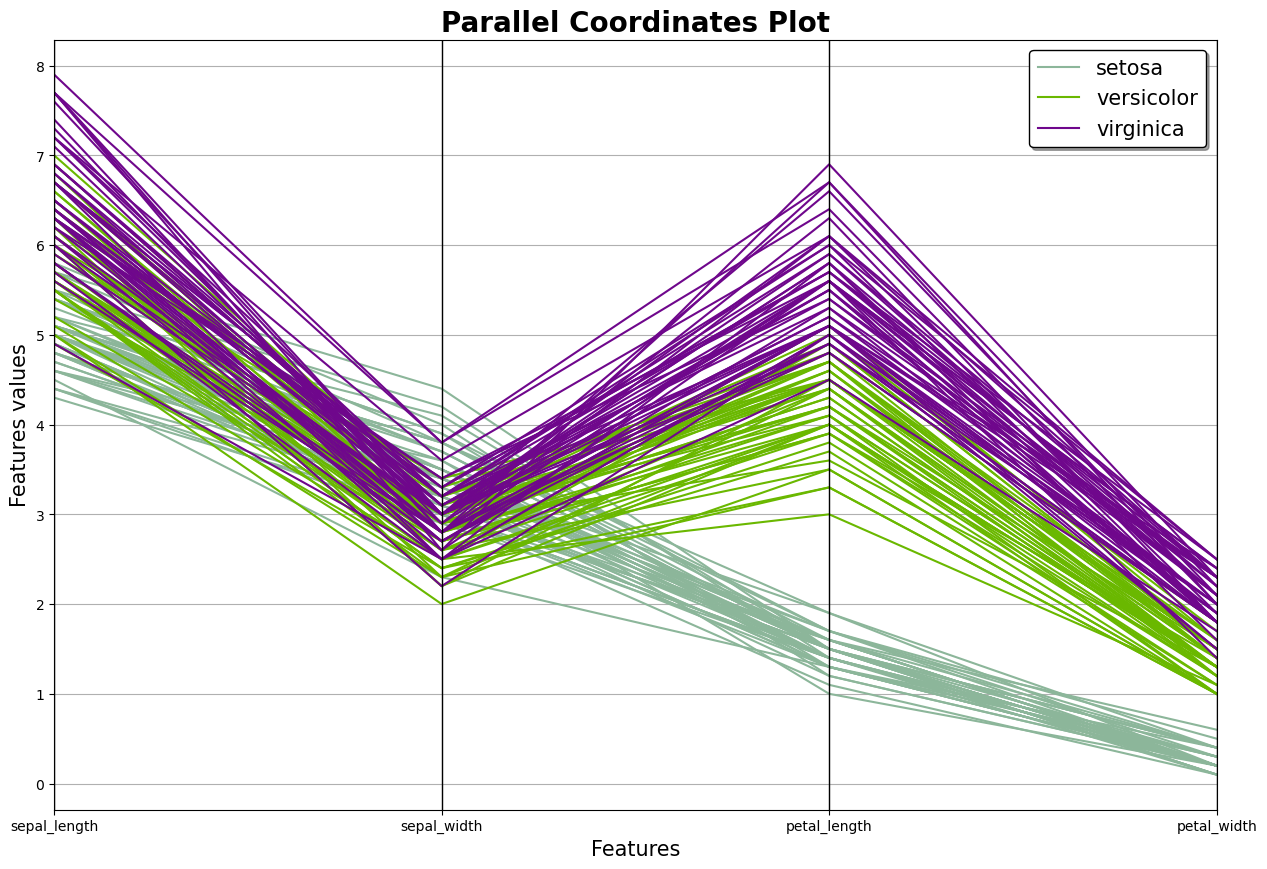

In [36]:
plt.figure(figsize=(15, 10))
parallel_coordinates(Iris, "species")  # Corrected line
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
#3. Andrews Curves


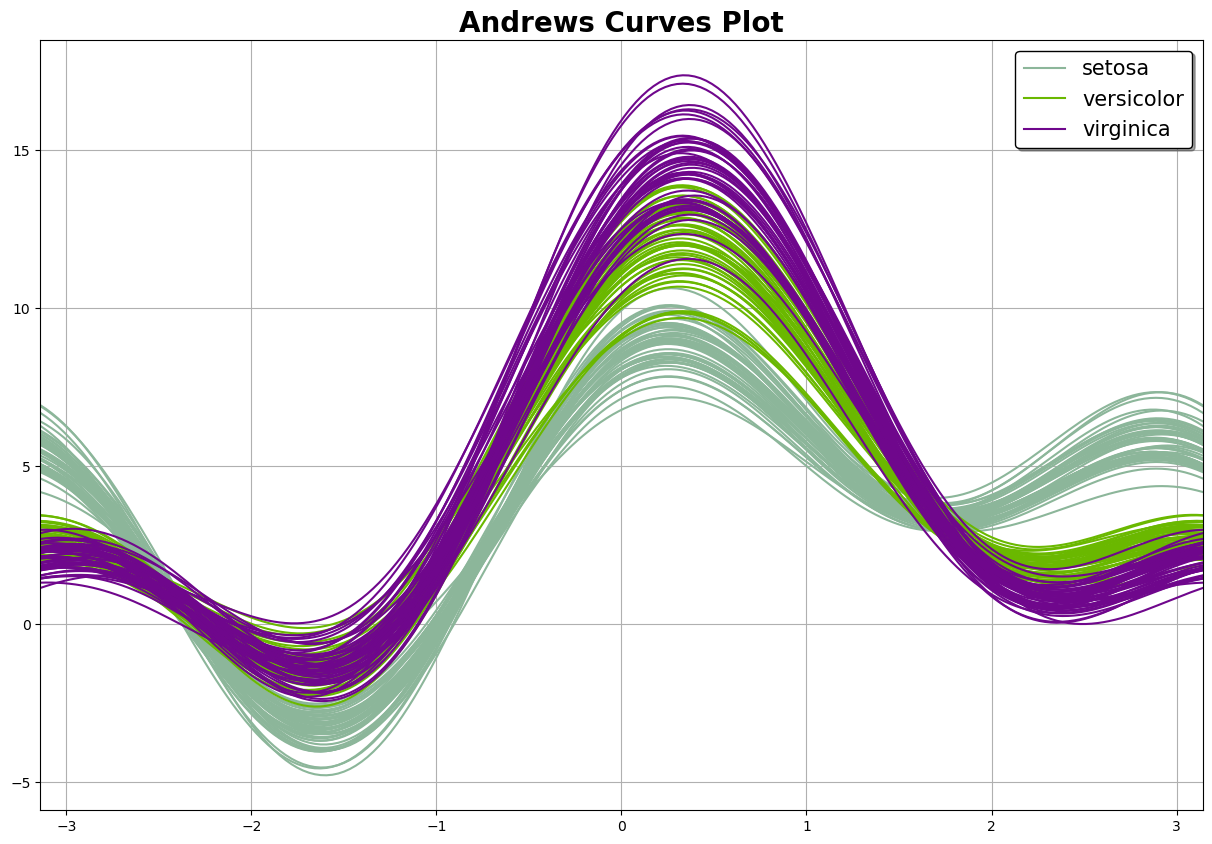

In [37]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(Iris, "species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
#4. Pairplot

C:\Users\asmit\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

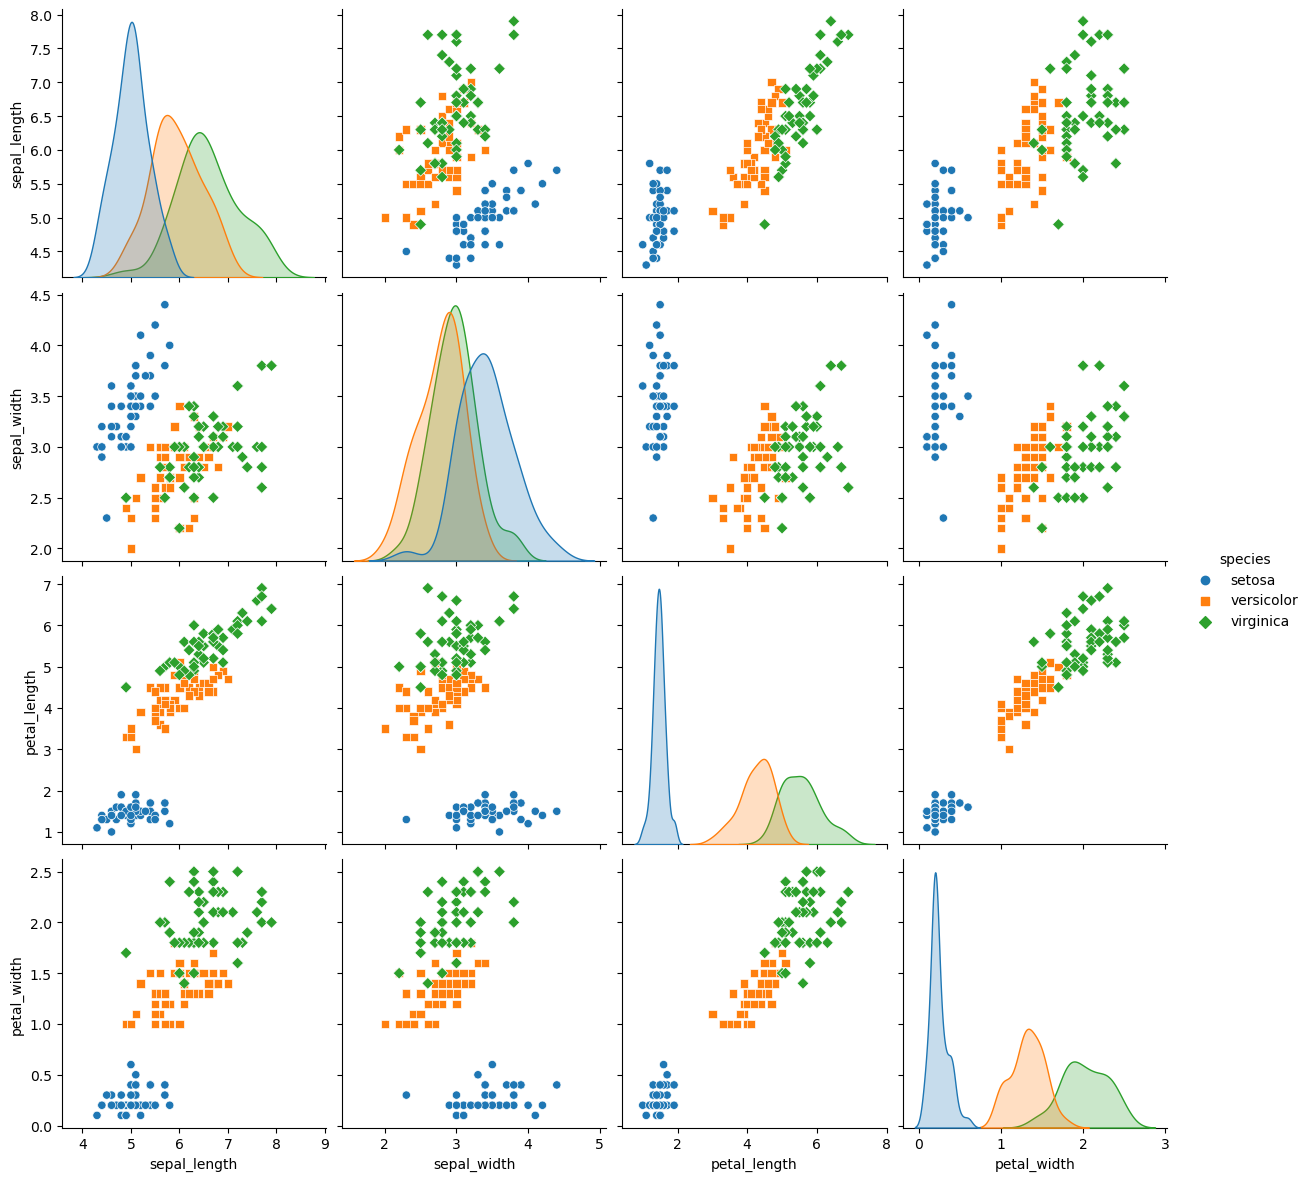

In [38]:
plt.figure()
sns.pairplot(Iris, hue = "species", size=3, markers=["o", "s", "D"])
plt.show()

In [ ]:
#4. Using KNN for classification

In [39]:
#1. Making predictions
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [42]:
#2. Evaluating predictions
#Building confusion matrix:

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [43]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [ ]:
#3. Using cross-validation for parameter tuning:

In [44]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

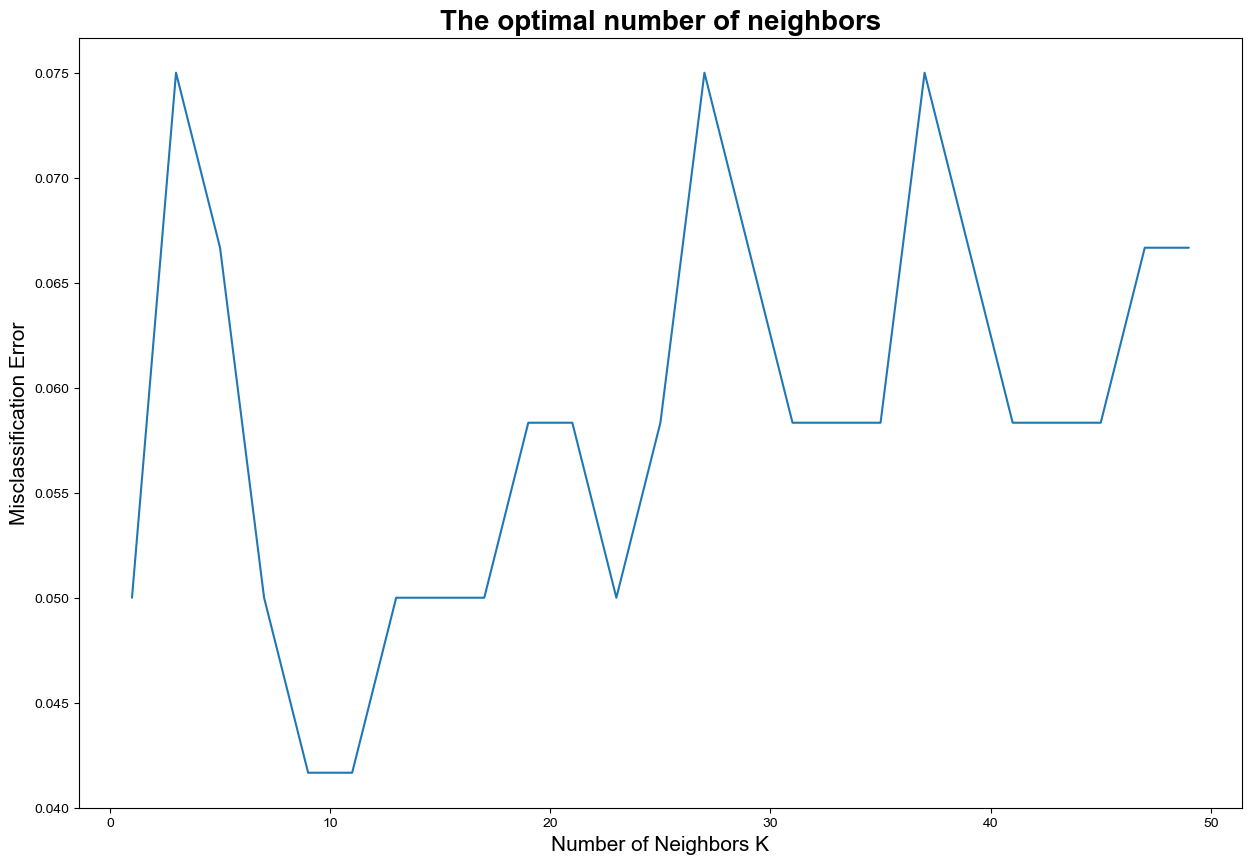

In [45]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [46]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.
